In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import operators
import lowlevelheuristics

In [2]:
def fitness(results):
    fitnesss = []
    lengths = []
    for idx, result in enumerate(results):
        fitnesss.append(np.sum(np.square(np.array(result) / BIN_CAPACITYS[idx])) / len(result))
        lengths.append(len(result))
    
    return np.mean(fitnesss)

In [3]:
def applyChromosome(problemsItems, chromosome):
    results = []
    
    for pIdx, items in enumerate(problemsItems):
        result = []
        idx = 0
        prev = 0
        while idx < len(items):
            for heuristic in chromosome:
                if idx < len(items):
                    result, prev = heuristic(result, items[idx], BIN_CAPACITYS[pIdx], prev)
                    idx += 1
                else:
                    break
        results.append(result)
            
    return results

In [4]:
def generateChromosome():
    chromosome = []
    chromosomeLength = np.random.randint(low=MIN_CHROMOSOME_SIZE,high=MAX_CHROMOSOME_SIZE)
    for i in range(chromosomeLength):
        heuristicChoice = np.random.randint(len(heuristicList))
        chromosome.append(heuristicList[heuristicChoice])
        
    return chromosome

In [5]:
def createPopulation():
    population = []
    for i in range(POPULATION_SIZE):
        population.append(generateChromosome())
        
    return population

In [6]:
def getPopulationFitness(population):
    populationResults = []
    for individual in population:
        populationResults.append(applyChromosome(problemsItems, individual))
        
    populationFitness = []
    for idx, result in enumerate(populationResults):
        populationFitness.append(fitness(result))
    
    return np.array(populationFitness), populationResults

In [7]:
def tournamentSelector(population, tournament_size=5):
    # Make the tournament
    random_indicies = np.random.randint(len(population), size=tournament_size).tolist()
    tournament = []
    for idx, val in np.ndenumerate(random_indicies):
        tournament.append(population[val])

    # Run the tournament
    fitnesss, results = getPopulationFitness(tournament)
    
    maxPos = np.argmax(fitnesss, axis=0)
    minPos = np.argmin(fitnesss, axis=0)
    
    return [random_indicies[maxPos], fitnesss[maxPos]], [random_indicies[minPos], fitnesss[minPos]]

A genetic algorithm that mutates by doing swap operations 2 times and does a crossover operation at 2 points

In [8]:
def geneticAlgorithm(population):
    newPop = population[:]
    
    for i in range(NUM_MUTATE):    
        best, worst = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        newPop[worst[0]] = operators.swap(population[best[0]], 1)
        
    for i in range(NUM_CROSSOVER):    
        best1, worst1 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        best2, worst2 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        result1, result2 = operators.crossover(population[best1[0]], population[best2[0]], 1)
        newPop[worst1[0]] = result1
        newPop[worst2[0]] = result2
    
    return newPop

In [9]:
def geneticAlgorithm2(population):
    newPop = []
    
    for i in range(NUM_MUTATE):    
        best, worst = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        newPop.append(operators.swap(population[best[0]], 1))
        
    for i in range(NUM_CROSSOVER):    
        best1, worst1 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        best2, worst2 = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        result1, result2 = operators.crossover(population[best1[0]], population[best2[0]], 1)
        newPop.append(result1)
        newPop.append(result2)
        
    for i in range(NUM_REPRODUCTION):    
        best, worst = tournamentSelector(population, tournament_size=TOURNAMENT_SIZE)
        newPop.append(population[best[0]])
    
    return newPop

In [10]:
def tabooSearch(current):
    operator = operatorList[np.random.randint(len(operatorList))]
    new = operator(current, heuristicList, 1)
    
    if new in tabooList:
        return current
    if fitness(applyChromosome(problemsItems, new)) > fitness(applyChromosome(problemsItems, current)):
        current = new
    
    tabooList.append(new)
    
    return current

In [11]:
location = './problems/'

problems = [
            ['bin1data/N1C1W1_O.BPP', 32],
            ['bin1data/N1C1W1_P.BPP', 26],
            ['bin1data/N1C1W1_T.BPP', 28],
            ['bin1data/N1C1W1_G.BPP', 25],
            ['bin1data/N1C1W1_K.BPP', 26],
            ['bin1data/N1C1W1_S.BPP', 28],
            ['bin1data/N1C1W1_F.BPP', 27],
    
            ['bin2data/N1W1B1R0.BPP', 18],
            ['bin2data/N1W1B1R1.BPP', 18],
            ['bin2data/N1W2B3R2.BPP', 10],
            ['bin2data/N1W2B2R0.BPP', 10],
            
            ['bin3data/HARD1.BPP', 57],
            ['bin3data/HARD3.BPP', 57],
            ['bin3data/HARD4.BPP', 57],
            ['bin3data/HARD6.BPP', 57],
        ]

heuristicList = [
    lowlevelheuristics.firstFit,
    lowlevelheuristics.lastFit,
    lowlevelheuristics.nextFit,
    lowlevelheuristics.bestFit,
    lowlevelheuristics.worstFit,
    #lowlevelheuristics.randomFit
]

problemIndexs = [6]
problemName = 'p1.png'

# problemIndexs = [0, 1, 2, 3, 4, 5]
# problemName = 'p2.png'

# problemIndexs = [10]
# problemName = 'p3.png'

# problemIndexs = [7, 8, 9]
# problemName = 'p4.png'

# problemIndexs = [14]
# problemName = 'p5.png'

# problemIndexs = [11, 12, 13]
# problemName = 'p6.png'


problemsItems = []
PROBLEM_SIZES = []
BIN_CAPACITYS = []
for idx, problemIndex in enumerate(problemIndexs):
    problemSet = pd.read_csv(location + problems[problemIndex][0], header=None).values.tolist()

    PROBLEM_SIZES.append(problemSet.pop(0)[0])
    BIN_CAPACITYS.append(problemSet.pop(0)[0])

    items = pd.DataFrame(problemSet)
    items = np.array(items[0])
    items = -np.sort(-items)

    assert PROBLEM_SIZES[idx] == len(items)
    
    problemsItems.append(items)

MIN_CHROMOSOME_SIZE = 10
MAX_CHROMOSOME_SIZE = max(PROBLEM_SIZES)

In [12]:
POPULATION_SIZE = 25
GENERATIONS = 300
TOURNAMENT_SIZE = 3

MUTATION_RATE = 0.5
CROSSOVER_RATE = 0.3

NUM_MUTATE = int(MUTATION_RATE * POPULATION_SIZE)
NUM_CROSSOVER = int(CROSSOVER_RATE * POPULATION_SIZE)
NUM_REPRODUCTION = POPULATION_SIZE - (NUM_MUTATE + NUM_CROSSOVER)

assert NUM_REPRODUCTION >= 0

SAMPLES = 30

REPORT_RATE = 1

samplesGaOverTime = []
samplesGaFinal = []

print("Genetic Algorithm:")
for sample in range(SAMPLES):
    gaOverTime = []
    population = createPopulation()
    for gen in range(GENERATIONS):    
        population = geneticAlgorithm(population)

        if gen % REPORT_RATE == 0:
            fitnesss, results = getPopulationFitness(population)
            max = np.argmax(fitnesss, axis=0)
            gaOverTime.append(fitnesss[max])
            
    samplesGaOverTime.append(gaOverTime)
    fitnesss, results = getPopulationFitness(population)
    finalFitness = fitnesss[np.argmax(fitnesss, axis=0)]
    samplesGaFinal.append(finalFitness)
    print("Sample " + str(sample + 1) + ": " + str(finalFitness))

Genetic Algorithm:
Sample 1: 0.9705071428571428
Sample 2: 0.9588111111111112
Sample 3: 0.9521518518518519
Sample 4: 0.9651357142857142
Sample 5: 0.9635785714285715
Sample 6: 0.957392857142857
Sample 7: 0.9556689655172415
Sample 8: 0.9630148148148147
Sample 9: 0.9588111111111112
Sample 10: 0.9565296296296296
Sample 11: 0.9588111111111112
Sample 12: 0.9593035714285714
Sample 13: 0.9587962962962963
Sample 14: 0.9603344827586207
Sample 15: 0.9588111111111112
Sample 16: 0.9705214285714285
Sample 17: 0.9624666666666668
Sample 18: 0.9668241379310345
Sample 19: 0.9715310344827586
Sample 20: 0.9609571428571428
Sample 21: 0.9587962962962963
Sample 22: 0.9630148148148147
Sample 23: 0.9600620689655174
Sample 24: 0.9587962962962963
Sample 25: 0.9588111111111112
Sample 26: 0.9581428571428573
Sample 27: 0.9609571428571428
Sample 28: 0.9674392857142857
Sample 29: 0.96084
Sample 30: 0.9564535714285715


In [13]:
operatorList = [
    operators.add,
    operators.change,
    operators.remove,
    operators.swap
]

tabooList = []

samplesTabuOverTime = []
samplesTabuFinal = []

print("Tabu Search:")
for sample in range(SAMPLES):
    tabuOverTime = []
    current = generateChromosome()
    for gen in range(GENERATIONS):    
        current = tabooSearch(current)

        if gen % REPORT_RATE == 0:
            result = fitness(applyChromosome(problemsItems, current))
            tabuOverTime.append(result)
            
    samplesTabuOverTime.append(tabuOverTime)
    finalFitness = fitness(applyChromosome(problemsItems, current))
    samplesTabuFinal.append(finalFitness)
    print("Sample " + str(sample + 1) + ": " + str(finalFitness))

Tabu Search:
Sample 1: 0.9526464285714286
Sample 2: 0.9367607142857144
Sample 3: 0.9481766666666667
Sample 4: 0.9446785714285715
Sample 5: 0.9616793103448276
Sample 6: 0.959325
Sample 7: 0.9560111111111111
Sample 8: 0.9742068965517242
Sample 9: 0.9672035714285714
Sample 10: 0.9469821428571429
Sample 11: 0.9538678571428572
Sample 12: 0.956482142857143
Sample 13: 0.9523518518518519
Sample 14: 0.9473655172413793
Sample 15: 0.9606821428571429
Sample 16: 0.9485392857142859
Sample 17: 0.9560111111111111
Sample 18: 0.9378714285714287
Sample 19: 0.9542413793103449
Sample 20: 0.9440071428571429
Sample 21: 0.9516749999999999
Sample 22: 0.9517321428571429
Sample 23: 0.9303827586206898
Sample 24: 0.9379241379310345
Sample 25: 0.9497
Sample 26: 0.9471035714285714
Sample 27: 0.9646607142857143
Sample 28: 0.9548172413793103
Sample 29: 0.9591964285714285
Sample 30: 0.9432814814814816


In [14]:
print('Low level heuristics:')

lowLevelFinal = []

nonRandomHeuristicList = heuristicList[:len(heuristicList)]

print(nonRandomHeuristicList)

for heuristic in nonRandomHeuristicList:
    heuristicFit = fitness(applyChromosome(problemsItems, [heuristic]))
    lowLevelFinal.append(heuristicFit)

Low level heuristics:
[<function firstFit at 0x7f7fbcb79d90>, <function lastFit at 0x7f7fbcb79e18>, <function nextFit at 0x7f7fbcb79f28>, <function bestFit at 0x7f7fbc8ae048>, <function worstFit at 0x7f7fbc8ae0d0>]


In [15]:
print('Random fit heuristics:')

samplesRandomFinal = []

for sample in range(SAMPLES):
    heuristicFit = fitness(applyChromosome(problemsItems, [lowlevelheuristics.randomFit]))
    samplesRandomFinal.append(heuristicFit)
    print("Sample " + str(sample + 1) + ": " + str(heuristicFit))

Random fit heuristics:
Sample 1: 0.8900259259259259
Sample 2: 0.889514814814815
Sample 3: 0.8898555555555555
Sample 4: 0.8899962962962964
Sample 5: 0.8891074074074075
Sample 6: 0.8949814814814814
Sample 7: 0.8914777777777778
Sample 8: 0.8910555555555555
Sample 9: 0.8894333333333334
Sample 10: 0.8901000000000001
Sample 11: 0.8917370370370371
Sample 12: 0.8896777777777778
Sample 13: 0.8909074074074075
Sample 14: 0.8900037037037039
Sample 15: 0.8908851851851851
Sample 16: 0.8901074074074073
Sample 17: 0.8908481481481482
Sample 18: 0.8902407407407407
Sample 19: 0.8949148148148148
Sample 20: 0.8907296296296296
Sample 21: 0.8903222222222223
Sample 22: 0.8945444444444445
Sample 23: 0.8890777777777777
Sample 24: 0.8918037037037038
Sample 25: 0.8899370370370371
Sample 26: 0.8905962962962964
Sample 27: 0.8934185185185185
Sample 28: 0.8923592592592592
Sample 29: 0.8897074074074074
Sample 30: 0.8897962962962963


[0.8900259259259259, 0.889514814814815, 0.8898555555555555, 0.8899962962962964, 0.8891074074074075, 0.8949814814814814, 0.8914777777777778, 0.8910555555555555, 0.8894333333333334, 0.8901000000000001, 0.8917370370370371, 0.8896777777777778, 0.8909074074074075, 0.8900037037037039, 0.8908851851851851, 0.8901074074074073, 0.8908481481481482, 0.8902407407407407, 0.8949148148148148, 0.8907296296296296, 0.8903222222222223, 0.8945444444444445, 0.8890777777777777, 0.8918037037037038, 0.8899370370370371, 0.8905962962962964, 0.8934185185185185, 0.8923592592592592, 0.8897074074074074, 0.8897962962962963]
Genetic Algorithm Final: 0.961109073253056
Tabu Search Final: 0.9516521249771939
Random Final: 0.8909054320987655


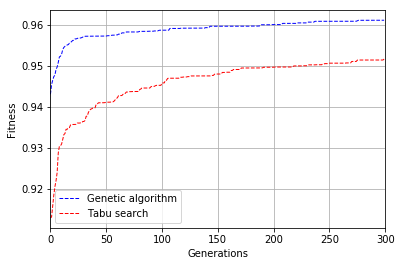

In [16]:
print(samplesRandomFinal)
generations = np.arange(int(GENERATIONS/REPORT_RATE))

meanGaOverTime = np.mean(samplesGaOverTime, axis=0)
meanTabuOverTime = np.mean(samplesTabuOverTime, axis=0)

meanGaFinal = np.mean(samplesGaFinal)
meanTabuFinal = np.mean(samplesTabuFinal)
meanRandomFinal = np.mean(samplesRandomFinal)

stdGaFinal = np.std(samplesGaFinal)
stdTabuFinal = np.std(samplesTabuFinal)
stdRandomFinal = np.std(samplesRandomFinal)

maxGaFinal = np.max(samplesGaFinal)
maxTabuFinal = np.max(samplesTabuFinal)
maxRandomFinal = np.max(samplesRandomFinal)

print("Genetic Algorithm Final: " + str(meanGaFinal))
print("Tabu Search Final: " + str(meanTabuFinal))
print("Random Final: " + str(meanRandomFinal))

fig = plt.figure()
plt.grid(1)
plt.xlim([0, GENERATIONS])
plt.ion()
plt.xlabel('Generations')
plt.ylabel('Fitness')

plots = []
descriptions = []
plots.append(plt.plot(generations, meanGaOverTime, 'b--', linewidth=1, markersize=3)[0])
plots.append(plt.plot(generations, meanTabuOverTime, 'r--', linewidth=1, markersize=3)[0])
descriptions.append("Genetic algorithm")
descriptions.append("Tabu search")

plt.legend(plots, descriptions)
fig.savefig(problemName)
plt.show(5)

plt.close()

In [17]:
algNames = ['Genetic algorithm', 'Tabu search', 'Random fit', 'First fit', 'Last fit', 'Next fit', 'Best fit', 'Worst fit']
meanFinal = [meanGaFinal, meanTabuFinal, meanRandomFinal]
meanFinal.extend(lowLevelFinal)

padding = [None, None, None, None, None]

stdFinal =[stdGaFinal, stdTabuFinal, stdRandomFinal]
stdFinal.extend(padding)

maxFinal =[maxGaFinal, maxTabuFinal, maxRandomFinal]
maxFinal.extend(padding)

firstSample = 49
algFitFirst = [meanGaOverTime[firstSample], meanTabuOverTime[firstSample], None]
algFitFirst.extend(padding)

secondSample = 149
algFitSecond = [meanGaOverTime[secondSample], meanTabuOverTime[secondSample], None]
algFitSecond.extend(padding)


d = {'Empty': pd.to_numeric([None, None, None, None, None, None, None, None]), 
     'Algorithm': algNames, 
     '50': algFitFirst, 
     '150': algFitSecond, 
     'mean': meanFinal,
     'std': stdFinal,
     'max': maxFinal
    }

df = pd.DataFrame(data=d)

list(df.columns.values)

result = df[['Empty', 'Algorithm', '50', '150', 'mean', 'std', 'max']]
result

,Empty,Algorithm,50,150,mean,std,max
0,NaN,Genetic algorithm,0.957260,0.959643,0.961109,0.004518,0.971531
1,NaN,Tabu search,0.941052,0.948004,0.951652,0.009342,0.974207
2,NaN,Random fit,NaN,NaN,0.890905,0.001609,0.894981
3,NaN,First fit,NaN,NaN,0.902004,NaN,NaN
4,NaN,Last fit,NaN,NaN,0.887967,NaN,NaN
5,NaN,Next fit,NaN,NaN,0.921481,NaN,NaN
6,NaN,Best fit,NaN,NaN,0.902004,NaN,NaN
7,NaN,Worst fit,NaN,NaN,0.902004,NaN,NaN


In [18]:
print(result.to_latex(index=False, bold_rows=True, na_rep=''))

\begin{tabular}{rlrrrrr}
\toprule
 Empty &          Algorithm &        50 &       150 &      mean &       std &       max \\
\midrule
       &  Genetic algorithm &  0.957260 &  0.959643 &  0.961109 &  0.004518 &  0.971531 \\
       &        Tabu search &  0.941052 &  0.948004 &  0.951652 &  0.009342 &  0.974207 \\
       &         Random fit &           &           &  0.890905 &  0.001609 &  0.894981 \\
       &          First fit &           &           &  0.902004 &           &           \\
       &           Last fit &           &           &  0.887967 &           &           \\
       &           Next fit &           &           &  0.921481 &           &           \\
       &           Best fit &           &           &  0.902004 &           &           \\
       &          Worst fit &           &           &  0.902004 &           &           \\
\bottomrule
\end{tabular}

